In [48]:
import random

def CreateRandStr(alphabet,str_len):
    rand_str = "" #create an empty string
    chr_cnt = 0 #how many characters of the string we have determined so far
    while chr_cnt < str_len:
        rand_str = rand_str + alphabet[random.randint(0,len(alphabet)-1)]
        chr_cnt = chr_cnt + 1
    return rand_str     

Now we can create random strings of specific size based on a particular dataset. For example, we can build strigs of 10 characters based on the DNA alphabet:

In [49]:
text = CreateRandStr("ACGT",10000) #Creating a random string

Import the original function for testing

In [50]:
import numpy

def PatternCount(text, pattern):
    count = 0;
    pattern_length = len(pattern)
    text_length = len(text)
    for i in range(0, text_length-pattern_length+1):
        if (text[i:i+pattern_length]==pattern):
            count = count + 1
    return count   

def FrequentWords(text, k):
    #frequent_patterns = list()
    frequent_patterns = set()
    text_length = len(text)
    count=numpy.zeros(text_length-k+1)
    # calcuate word frequency

    for i in range(0, text_length-k+1):
        pattern = text[i:i+k]
        count[i] = PatternCount(text, pattern)

    # maximum frequency 
    max_count = max(count)
    
    # add words with max frequency to frequent_patterns
    for i in range(0, text_length-k+1): 
        if (count[i]==max_count):
            #frequent_patterns.append(text[i:i+k])
            frequent_patterns.add(text[i:i+k])                  
    return(frequent_patterns,max_count)

In [51]:
print(FrequentWords(text,5)) #Test the result

({'GGTTA', 'CCTAA'}, 20.0)


In [52]:
from collections import defaultdict #Can be done without this, but saves 4 lines of code

def FrequentWordsDict(text,k,top_k = 1,only_max = False):
    """Takes as input a string text, an integer k, an integer top_k and a boolean only_max. Returns all k-mers that
    occur at least top_k times in text. If only_max is true, it returns only the kmers appearing the most amount of times."""
    counts = defaultdict(int) #Whenever you try to assign a value to a non-existent key, they key is created with a value of 0
    max_counts = 0 #Bookkeeping the maximum number of occurences
    for i in range(len(text) - k + 1): #Loop over all kmers of text
        counts[text[i:i + k]] += 1 #Increment the specific entry, whether it exists or not
        if counts[text[i:i + k]] > max_counts:
            max_counts = counts[text[i:i + k]]
    res_counts = [] #Create an empty list that holds the results
    for (key,value) in counts.items(): #Iterate over all key value pairs
        if only_max == False:
            if value >= top_k: #If it occurs more than top_k times
                res_counts.append((key,value)) #Append it
        elif only_max == True: #If only_max == True
            if value == max_counts: #Append only if we are at max
                res_counts.append((key,value))
    return(res_counts)

In [53]:
print(FrequentWordsDict(text,5,1)) #This simply counts all kmers

[('CAAAT', 11), ('AAATT', 9), ('AATTG', 9), ('ATTGA', 7), ('TTGAC', 12), ('TGACT', 7), ('GACTG', 16), ('ACTGC', 8), ('CTGCG', 8), ('TGCGA', 8), ('GCGAG', 10), ('CGAGT', 8), ('GAGTA', 6), ('AGTAG', 9), ('GTAGC', 15), ('TAGCC', 13), ('AGCCC', 12), ('GCCCT', 10), ('CCCTA', 14), ('CCTAC', 13), ('CTACC', 10), ('TACCC', 17), ('ACCCA', 9), ('CCCAA', 13), ('CCAAA', 14), ('CAAAG', 12), ('AAAGT', 17), ('AAGTG', 6), ('AGTGT', 13), ('GTGTG', 12), ('TGTGG', 13), ('GTGGT', 15), ('TGGTA', 16), ('GGTAT', 8), ('GTATG', 5), ('TATGT', 8), ('ATGTC', 12), ('TGTCA', 10), ('GTCAC', 9), ('TCACA', 8), ('CACAC', 12), ('ACACA', 12), ('ACACT', 11), ('CACTC', 6), ('ACTCC', 9), ('CTCCT', 8), ('TCCTC', 13), ('CCTCG', 8), ('CTCGT', 12), ('TCGTG', 11), ('CGTGA', 6), ('GTGAA', 13), ('TGAAA', 14), ('GAAAG', 13), ('AAGTC', 11), ('AGTCG', 15), ('GTCGG', 16), ('TCGGG', 11), ('CGGGT', 11), ('GGGTC', 10), ('GGTCT', 11), ('GTCTA', 16), ('TCTAG', 16), ('CTAGC', 17), ('TAGCA', 13), ('AGCAC', 14), ('GCACT', 7), ('CACTA', 10), ('

In [54]:
print(FrequentWordsDict(text,5,1,True)) #This enforces the algorithm to select only the most frequent kmers

[('GGTTA', 20), ('CCTAA', 20)]


Now to begin the comparison between the two methods. We will create 3 strings for each length in the list [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000] . We will then time each of the functions on every string and compute a length-wise average. That will be plotted.

In [55]:
import matplotlib.pyplot as plt #Simple plotting
import time #Timing
import os #Check files in wd

In [56]:
#Create the strings, we do not want this to influence the comparison
strings_by_length = []
lengths = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
for strlen in range(3):
    if "strings_rep_{}.txt".format(strlen) in os.listdir(os.getcwd()):
        print("Found rep {}.".format(strlen),"Loading...")
        with open("strings_rep_{}.txt".format(strlen),"r+") as f:
            strings_by_length.append(f.read().splitlines())
    else:
        print("No strings found, creating new ones instead.")
        strings_by_length.append(list(map(lambda x: CreateRandStr("AGCT",x),lengths))) 
        #Wrap the random_string function provided in a lambda so that the first argument is the length 
        #instead of the second with a constant argument and then map it over the lengths array. 
        #Turn the lazy map object into a list an append it to strings by length
        print("Writing them to wd.")
    with open("strings_rep_{}.txt".format(strlen),"w+") as f:
        text = "\n".join(strings_by_length[strlen])
        f.write(text)
        f.flush()

Found rep 0. Loading...
Found rep 1. Loading...
Found rep 2. Loading...


In [59]:
results_naive = [] #Create two lists to hold the results
results_dict  = []
for i in range(len(lengths)): #For all lengths
    times_naive = [] #Holds the time for each repetition
    times_dict =  []
    for j in ('naive','dict'):
        for k in range(3): #For every repetition of the experiment.
            if j == 'naive':
                t0 = time.time() #Begin timing
                res = FrequentWords(strings_by_length[k][i],5) #Execute algorithm
                t1 = time.time() #Finish time
                times_naive.append(t1-t0) #Append difference
            elif j == 'dict':
                t0 = time.time() #Begin timing
                res = FrequentWordsDict(strings_by_length[k][i],5,top_k = 1,only_max = True) #Execute algorithm
                t1 = time.time() #Finish time
                times_dict.append(t1-t0) #Append difference
    results_naive.append(numpy.average(times_naive))
    results_dict.append(numpy.average(times_dict))
    print("Done with length {}".format(lengths[i]))

Done with length 10
Done with length 20
Done with length 30
Done with length 40
Done with length 50
Done with length 60
Done with length 70
Done with length 80
Done with length 90
Done with length 100
Done with length 200
Done with length 300
Done with length 400
Done with length 500
Done with length 600
Done with length 700
Done with length 800
Done with length 900
Done with length 1000
Done with length 2000
Done with length 3000
Done with length 4000
Done with length 5000
Done with length 6000
Done with length 7000
Done with length 8000
Done with length 9000
Done with length 10000


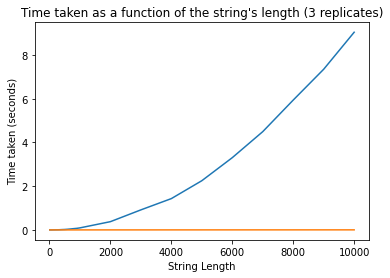

In [60]:
plt.plot(lengths,results_naive)
plt.plot(lengths,results_dict)
plt.title("Time taken as a function of the string's length (3 replicates)")
plt.xlabel("String Length")
plt.ylabel("Time taken (seconds)")
plt.show()

This almost makes the dictionary implementation look like a constant time algorithm

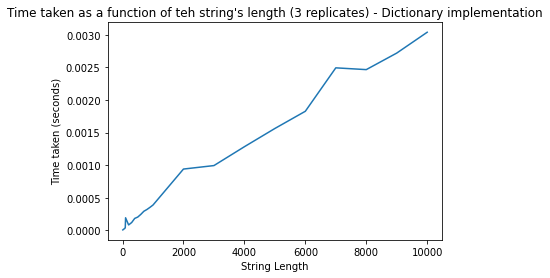

In [61]:
plt.plot(lengths,results_dict)
plt.title("Time taken as a function of teh string's length (3 replicates) - Dictionary implementation")
plt.xlabel("String Length")
plt.ylabel("Time taken (seconds)")
plt.show()

However, when examining it, we can clearly see that it resembles the complexity of a linear time algorithm, as it should

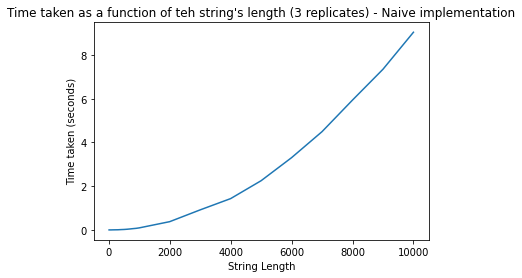

In [62]:
plt.plot(lengths,results_naive)
plt.title("Time taken as a function of teh string's length (3 replicates) - Naive implementation")
plt.xlabel("String Length")
plt.ylabel("Time taken (seconds)")
plt.show()

Looking at the naive algorithm, it is obvious to realize it has n^2 complexity.

For problem 3, a good way to find a pattern with k mismatches in our text would be to use Suffix Arrays. 

A suffix array is a data structure that contains the suffixes of the Text, sorted in lexicographic order.

For example, if we consider the text "AGCTC", the suffixes are "AGCTC", "GCTC", "CTC", "TC", "C". Those can obviously be indexed to [0, 1, 2, 3, 4]. Sorting them lexicographically gives us "AGCTC", "C", "CTC", "GCTC", "TC", or in array form [0, 4, 2, 1, 3]. 

It should be noted that we usually append a dollar to the string (as a character that always goes first). 

There are ways to construct this in O(n) time. 

Next, we can construct the Longest Common Prefix (LCP) array. It contains the longest common prefix between two consecutive entries in the suffix array. For example:

The suffix array is [0, 4, 2, 1, 3] or ["AGCTC", "C", "CTC", "GCTC", "TC"]
"AGCTC" and "C" have no common prefix, so LCP[0] = 0
"C" and "CTC" have a common prefix of length 1 ("C"), so LCP[1] = 1
"CTC" and "GCTC" have no common prefix, so LCP[2] = 0
"GCTC" and "TC" have no common prefix, so LCP[3] = 0

LCPs are also constructed in linear time.

Then, we can use an RMQ to consruct the more generic LCP, between all suffixes. This can be completed in constant time.

Finally, we concantenate the text and the pattern (this is there the dollar sign comes in, we need a symbol that appears in neither string and can be used as a reference) and we compute the LCP of the text at position i with the pattern. This gives us the position of the 1st mismatch. We proceed to skip that character and reconsider the string with that prefix and the character removed. Repeat for the pattern. We then match again to find the second mismatch. This can be done k times to solve the pattern matching with k mismatch problem.

The approach described here is a gross oversimplification over the one applied in practice in aligners such as STAR or Subread.